In [31]:
import importlib, sys
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append(r'C:\Users\owysocky\Documents\GitHub\CCE_scGeneRAI\source\investigate_and_compare')
    
import dataloaders as dtl 
importlib.reload(dtl)

import functions_graphs as fg
importlib.reload(fg)

import LRPGraph_code as lrpgraph
importlib.reload(lrpgraph)

<module 'LRPGraph_code' from 'C:\\Users\\owysocky\\Documents\\GitHub\\CCE_scGeneRAI\\source\\investigate_and_compare\\LRPGraph_code.py'>

In [32]:
path_to_metadata = r"G:\My Drive\SAFE_AI\CCE_DART\scGeneRAI_results\model_TCPA\clinical_features_proteomics.csv"
path_to_LRP_data = r"G:\My Drive\SAFE_AI\CCE_DART\scGeneRAI_results\model_TCPA\LRP_individual_top1000_selected_edges_T.csv"



# Upload LRP data

In [33]:
lrp_df = dtl.LRPData(file_path=path_to_LRP_data, delimiter=",").read_and_validate()
lrp_df.head()

,RAD50_exp - ARHGEF12_exp,PBRM1_exp - ARHGEF12_exp,CPEB3_exp - ARHGEF12_exp,SETD2_exp - ARHGEF12_exp,PRDM2_exp - ARHGEF12_exp,TACC3_exp - ARHGEF12_exp,ATRX_exp - ARHGEF12_exp,IL6ST_exp - ARHGEF12_exp,DDX3X_exp - ARHGEF12_exp,ARID2_exp - ARHGEF12_exp,...,TLE1_exp - PREX1_prot,TLE3_exp - PREX1_prot,COLLAGENVI_prot - ADAR1_prot,MYH11_prot - ADAR1_prot,S6_prot - MSH6_prot,MYH11_prot - MSH6_prot,RBM15_prot - MSH6_prot,RBM15_prot - BRD4_prot,COLLAGENVI_prot - COG3_prot,PLCG1_exp - DUSP4_prot
TCGA-3C-AALI,0.012284,0.008329,0.010348,0.010029,0.008384,0.007105,0.011653,0.011181,0.007027,0.008398,...,0.003137,0.005674,0.004431,0.003103,0.004370,0.002302,0.003131,0.002585,0.002783,0.005255
TCGA-A7-A0D9,0.001656,0.004180,0.001039,0.002857,0.001899,0.006282,0.001451,0.003183,0.000465,0.001604,...,0.006595,0.001799,0.010996,0.006714,0.007436,0.006103,0.008576,0.008704,0.009421,0.008415
TCGA-A7-A0DA,0.007080,0.001867,0.005321,0.003380,0.002572,0.002405,0.005209,0.005325,0.001134,0.003856,...,0.002229,0.001642,0.000651,0.002564,0.002252,0.002545,0.002000,0.001171,0.001156,0.003834
TCGA-A7-A0DB,0.002780,0.002479,0.002296,0.001298,0.003378,0.002837,0.003669,0.002002,0.004289,0.003155,...,0.001398,0.005947,0.003056,0.003670,0.006593,0.004790,0.004966,0.004349,0.002510,0.005351
TCGA-A7-A13D,0.010510,0.005904,0.008887,0.005853,0.007583,0.003873,0.007034,0.006979,0.005045,0.006659,...,0.004346,0.005444,0.002068,0.003144,0.002960,0.002158,0.002569,0.003118,0.002332,0.003106


# Upload metadata

In [34]:

# laod metadata
metadata_df = dtl.MetaData(file_path=path_to_metadata, delimiter=",")
metadata_df.load_data()
metadata_df.match_index_with_lrp_df(lrp_df)
metadata_df.validate_data_indices(lrp_df)

metadata_df.summarize()

,Column Name,Data Type,Missing Values,Unique Values,Categories,Parameter Type
0,acronym,object,0,1,[BRCA],Categorical
1,tumor_tissue_site,object,0,1,[Breast],Categorical
2,response,int64,0,1,NaN,Integer
3,HER2,object,0,6,"[Positive, Negative, Equivocal, [Not Evaluated...",Categorical
4,Estrogen_receptor,object,0,4,"[Positive, Negative, [Not Evaluated], Indeterm...",Categorical
5,Progesterone_receptor,object,0,4,"[Positive, Negative, Indeterminate, [Not Evalu...",Categorical
6,TNBC,object,0,2,"[nonTNBC, TNBC]",Categorical


# Select set of genes (nodes) of interest

In [35]:

#keywords = ["ARHGEF12", "CHEK1", "BRCA1"]
keywords = None

filtered_df = fg.filter_columns_by_keywords(lrp_df, keywords)
filtered_df.head()

,RAD50_exp - ARHGEF12_exp,PBRM1_exp - ARHGEF12_exp,CPEB3_exp - ARHGEF12_exp,SETD2_exp - ARHGEF12_exp,PRDM2_exp - ARHGEF12_exp,TACC3_exp - ARHGEF12_exp,ATRX_exp - ARHGEF12_exp,IL6ST_exp - ARHGEF12_exp,DDX3X_exp - ARHGEF12_exp,ARID2_exp - ARHGEF12_exp,...,TLE1_exp - PREX1_prot,TLE3_exp - PREX1_prot,COLLAGENVI_prot - ADAR1_prot,MYH11_prot - ADAR1_prot,S6_prot - MSH6_prot,MYH11_prot - MSH6_prot,RBM15_prot - MSH6_prot,RBM15_prot - BRD4_prot,COLLAGENVI_prot - COG3_prot,PLCG1_exp - DUSP4_prot
TCGA-3C-AALI,0.012284,0.008329,0.010348,0.010029,0.008384,0.007105,0.011653,0.011181,0.007027,0.008398,...,0.003137,0.005674,0.004431,0.003103,0.004370,0.002302,0.003131,0.002585,0.002783,0.005255
TCGA-A7-A0D9,0.001656,0.004180,0.001039,0.002857,0.001899,0.006282,0.001451,0.003183,0.000465,0.001604,...,0.006595,0.001799,0.010996,0.006714,0.007436,0.006103,0.008576,0.008704,0.009421,0.008415
TCGA-A7-A0DA,0.007080,0.001867,0.005321,0.003380,0.002572,0.002405,0.005209,0.005325,0.001134,0.003856,...,0.002229,0.001642,0.000651,0.002564,0.002252,0.002545,0.002000,0.001171,0.001156,0.003834
TCGA-A7-A0DB,0.002780,0.002479,0.002296,0.001298,0.003378,0.002837,0.003669,0.002002,0.004289,0.003155,...,0.001398,0.005947,0.003056,0.003670,0.006593,0.004790,0.004966,0.004349,0.002510,0.005351
TCGA-A7-A13D,0.010510,0.005904,0.008887,0.005853,0.007583,0.003873,0.007034,0.006979,0.005045,0.006659,...,0.004346,0.005444,0.002068,0.003144,0.002960,0.002158,0.002569,0.003118,0.002332,0.003106


Prepare dataframe to create graphs: columns = samples, index = edges

In [36]:
LRP_to_graphs = fg.prepare_lrp_to_graphs(filtered_df)
LRP_to_graphs.head()

,index,TCGA-3C-AALI,TCGA-A7-A0D9,TCGA-A7-A0DA,TCGA-A7-A0DB,TCGA-A7-A13D,TCGA-A7-A13E,TCGA-A7-A13F,TCGA-A7-A26E,TCGA-A7-A26F,...,TCGA-A2-A4S2,TCGA-A2-A4S3,TCGA-A7-A0CD,TCGA-A7-A0CE,TCGA-A7-A0CG,TCGA-A7-A0CH,TCGA-A7-A0CJ,TCGA-A1-A0SQ,source_node,target_node
0,RAD50_exp - ARHGEF12_exp,0.012284,0.001656,0.007080,0.002780,0.010510,0.002229,0.001211,0.007317,0.006903,...,0.007556,0.008964,0.017443,0.004530,0.003794,0.006807,0.004074,0.004585,RAD50_exp,ARHGEF12_exp
1,PBRM1_exp - ARHGEF12_exp,0.008329,0.004180,0.001867,0.002479,0.005904,0.001701,0.000342,0.015153,0.005250,...,0.005041,0.007816,0.009821,0.002991,0.004764,0.006545,0.005398,0.001855,PBRM1_exp,ARHGEF12_exp
2,CPEB3_exp - ARHGEF12_exp,0.010348,0.001039,0.005321,0.002296,0.008887,0.002314,0.003193,0.005675,0.005355,...,0.004131,0.005600,0.012111,0.004536,0.003092,0.006699,0.006770,0.003485,CPEB3_exp,ARHGEF12_exp
3,SETD2_exp - ARHGEF12_exp,0.010029,0.002857,0.003380,0.001298,0.005853,0.001055,0.000486,0.008865,0.004171,...,0.005508,0.007043,0.011299,0.003437,0.002743,0.004979,0.004051,0.004113,SETD2_exp,ARHGEF12_exp
4,PRDM2_exp - ARHGEF12_exp,0.008384,0.001899,0.002572,0.003378,0.007583,0.001618,0.003196,0.013525,0.004076,...,0.005068,0.007091,0.014868,0.003073,0.005460,0.006376,0.005865,0.006155,PRDM2_exp,ARHGEF12_exp


## Define number of top n strongest edges to build graphs.
 For each graph the top_n edges is calcualted individually.

In [37]:
top_n = 150 # can be None, than all edges will be used

In [38]:
node_color_mapper = {'exp': 'lightgray', 'mut': 'red', 'amp': 'orange', 'del': 'green', 'fus': 'blue', 'prot':'pink'}


# Compare 2 groups of samples

In [39]:
stratify_by = "TNBC"
metadata_df.data[stratify_by].unique()

array(['nonTNBC', 'TNBC'], dtype=object)

In [40]:
LRP_to_graphs_stratified = fg.split_and_aggregate_lrp(LRP_to_graphs,
                                                       metadata_df.data,                                                        
                                                       comparison_type="group_vs_group", 
                                                       stratify_by=stratify_by,                                                        
                                                       agg_func="median",
                                                       group1_name = "TNBC",
                                                       group2_name = "nonTNBC")
LRP_to_graphs_stratified

,index,source_node,target_node,TNBC,nonTNBC
0,RAD50_exp - ARHGEF12_exp,RAD50_exp,ARHGEF12_exp,0.005899,0.004630
1,PBRM1_exp - ARHGEF12_exp,PBRM1_exp,ARHGEF12_exp,0.004501,0.003803
2,CPEB3_exp - ARHGEF12_exp,CPEB3_exp,ARHGEF12_exp,0.006547,0.004250
3,SETD2_exp - ARHGEF12_exp,SETD2_exp,ARHGEF12_exp,0.004335,0.003541
4,PRDM2_exp - ARHGEF12_exp,PRDM2_exp,ARHGEF12_exp,0.004928,0.004094
...,...,...,...,...,...
4771,MYH11_prot - MSH6_prot,MYH11_prot,MSH6_prot,0.003706,0.004226
4772,RBM15_prot - MSH6_prot,RBM15_prot,MSH6_prot,0.002329,0.003707
4773,RBM15_prot - BRD4_prot,RBM15_prot,BRD4_prot,0.001616,0.002773
4774,COLLAGENVI_prot - COG3_prot,COLLAGENVI_prot,COG3_prot,0.001415,0.001809


In [41]:
LRP_to_graphs_stratified = fg.split_and_aggregate_lrp(LRP_to_graphs,
                                                       metadata_df.data,                                                        
                                                       comparison_type="sample_vs_group", 
                                                       stratify_by=stratify_by,                                                        
                                                       agg_func="median",
                                                       sample1_name = "TCGA-A7-A0DA",
                                                       group_name = "TNBC",
                                                       )
LRP_to_graphs_stratified

,index,source_node,target_node,TCGA-A7-A0DA,TNBC_aggregated
0,RAD50_exp - ARHGEF12_exp,RAD50_exp,ARHGEF12_exp,0.007080,0.005806
1,PBRM1_exp - ARHGEF12_exp,PBRM1_exp,ARHGEF12_exp,0.001867,0.004538
2,CPEB3_exp - ARHGEF12_exp,CPEB3_exp,ARHGEF12_exp,0.005321,0.006622
3,SETD2_exp - ARHGEF12_exp,SETD2_exp,ARHGEF12_exp,0.003380,0.004341
4,PRDM2_exp - ARHGEF12_exp,PRDM2_exp,ARHGEF12_exp,0.002572,0.004990
...,...,...,...,...,...
4771,MYH11_prot - MSH6_prot,MYH11_prot,MSH6_prot,0.002545,0.003846
4772,RBM15_prot - MSH6_prot,RBM15_prot,MSH6_prot,0.002000,0.002376
4773,RBM15_prot - BRD4_prot,RBM15_prot,BRD4_prot,0.001171,0.001626
4774,COLLAGENVI_prot - COG3_prot,COLLAGENVI_prot,COG3_prot,0.001156,0.001418


In [42]:
LRP_to_graphs_stratified = fg.split_and_aggregate_lrp(LRP_to_graphs,
                                                       metadata_df.data,                                                        
                                                       comparison_type="sample_vs_sample", 
                                                       agg_func="median",
                                                       sample1_name = "TCGA-A7-A0DA",
                                                       sample2_name = "TCGA-A7-A13D",
                                                       )
LRP_to_graphs_stratified

,index,source_node,target_node,TCGA-A7-A0DA,TCGA-A7-A13D
0,RAD50_exp - ARHGEF12_exp,RAD50_exp,ARHGEF12_exp,0.007080,0.010510
1,PBRM1_exp - ARHGEF12_exp,PBRM1_exp,ARHGEF12_exp,0.001867,0.005904
2,CPEB3_exp - ARHGEF12_exp,CPEB3_exp,ARHGEF12_exp,0.005321,0.008887
3,SETD2_exp - ARHGEF12_exp,SETD2_exp,ARHGEF12_exp,0.003380,0.005853
4,PRDM2_exp - ARHGEF12_exp,PRDM2_exp,ARHGEF12_exp,0.002572,0.007583
...,...,...,...,...,...
4771,MYH11_prot - MSH6_prot,MYH11_prot,MSH6_prot,0.002545,0.002158
4772,RBM15_prot - MSH6_prot,RBM15_prot,MSH6_prot,0.002000,0.002569
4773,RBM15_prot - BRD4_prot,RBM15_prot,BRD4_prot,0.001171,0.003118
4774,COLLAGENVI_prot - COG3_prot,COLLAGENVI_prot,COG3_prot,0.001156,0.002332


In [43]:
top_n = 150
G_dict12 = fg.get_all_graphs_from_lrp(LRP_to_graphs_stratified, top_n)

fg.get_all_fixed_size_adjacency_matrices(G_dict12)
fg.get_all_fixed_size_embeddings(G_dict12)

Processing sample 0
                                               aliases
0                                            ['MEF2D']
1    ['BANDDOS', 'C-FMS', 'CD115', 'CSF-1R', 'CSF1R...
2                                             ['MGMT']
3    ['ALPS4', 'CMNS', 'KRAS', 'N-ras', 'NCMS', 'NR...
4    ['CCM4', 'CLAPO', 'CLOVE', 'CWS5', 'HMH', 'MCA...
..                                                 ...
649                     ['CARLo-3', 'PCAT8', 'PRNCR1']
650                           ['ELFN1-AS1', 'MYCLo-2']
651                                     ['PIK3CD-AS2']
652                                  ['COII', 'MTCO2']
653                                          ['MTND1']

[654 rows x 1 columns]
Processing sample 1
                                               aliases
0                                            ['MEF2D']
1    ['BANDDOS', 'C-FMS', 'CD115', 'CSF-1R', 'CSF1R...
2                                             ['MGMT']
3    ['ALPS4', 'CMNS', 'KRAS', 'N-ras', 'NCMS', 'NR...
4

## plot 2 graphs with avearge LRP values

In [44]:
G_dict12[0].G.nodes
node_df = pd.DataFrame(G_dict12[0].G.nodes, columns=['node'])
node_df[['name', 'type']] = node_df['node'].str.rsplit('_', n=1, expand=True)
node_df


,node,name,type
0,SFRP1_exp,SFRP1,exp
1,SAV1_exp,SAV1,exp
2,MAML2_exp,MAML2,exp
3,ERALPHA_prot,ERALPHA,prot
4,CREB3L2_exp,CREB3L2,exp
...,...,...,...
78,BTK_exp,BTK,exp
79,ARHGEF10L_exp,ARHGEF10L,exp
80,FBLN2_exp,FBLN2,exp
81,TLE3_exp,TLE3,exp


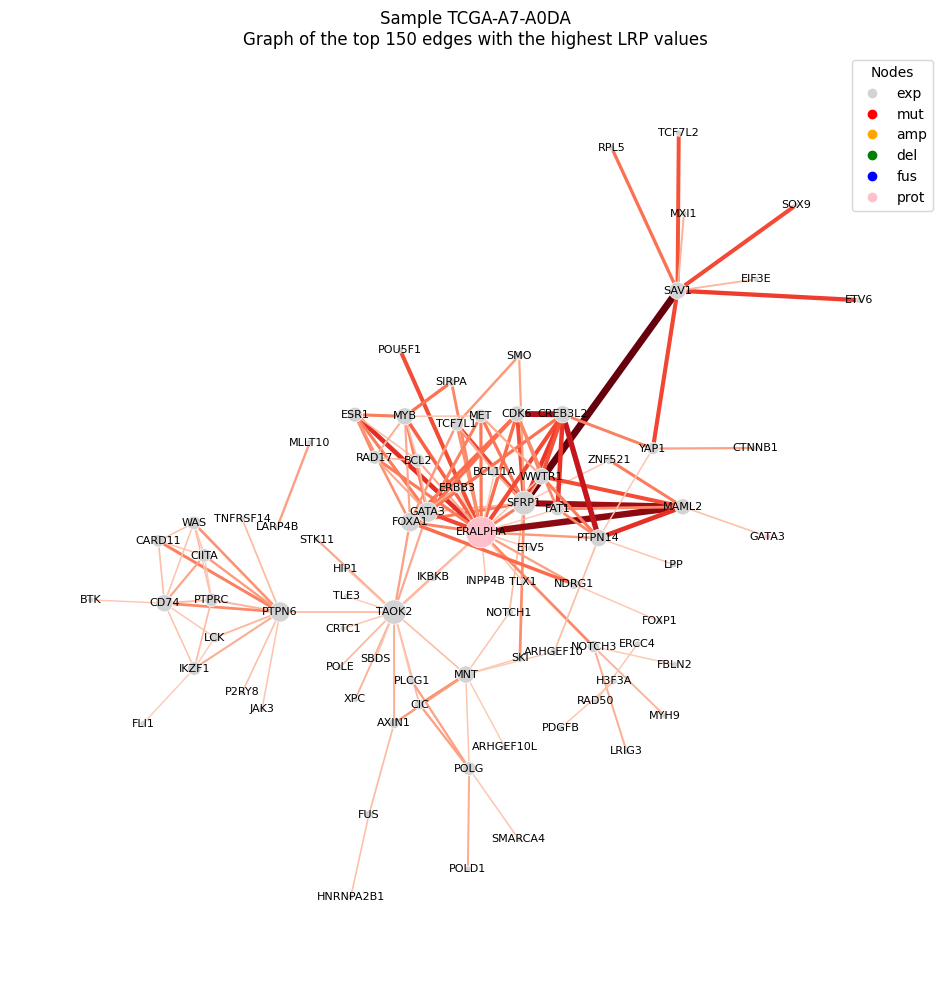

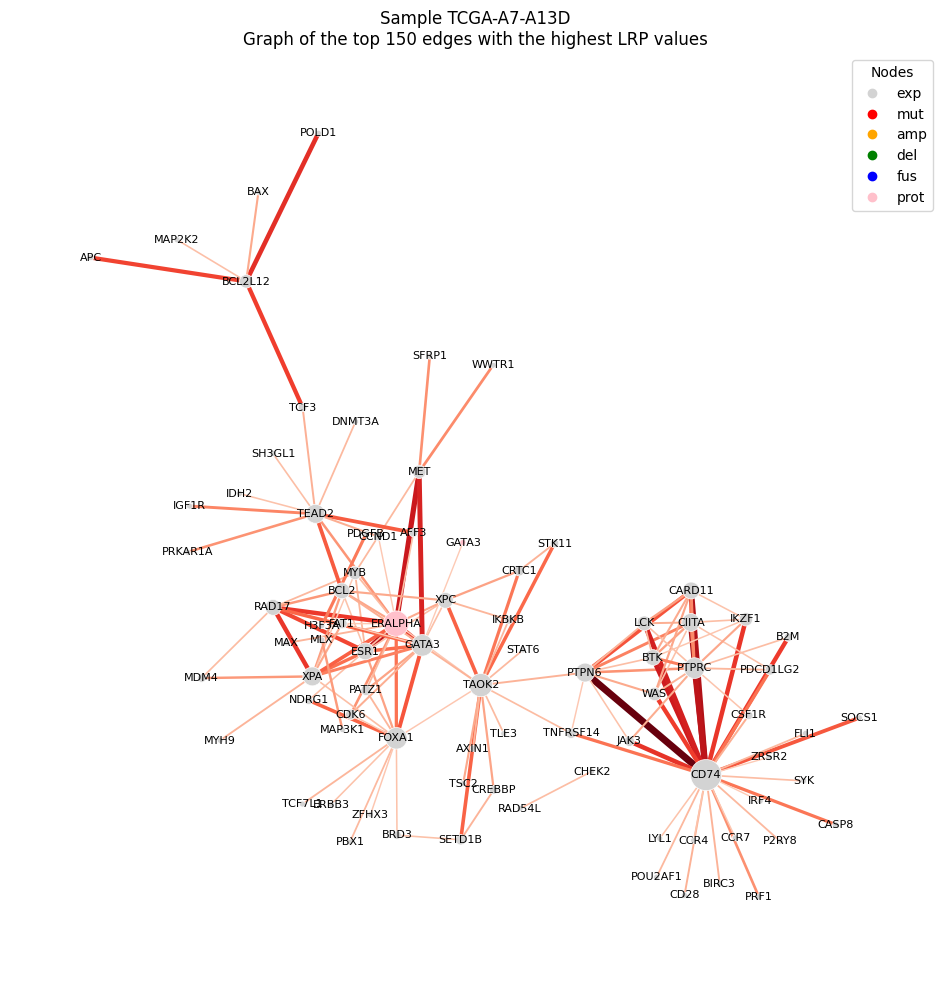

In [45]:
fg.plot_graph(G_dict12[0], node_color_mapper)
fg.plot_graph(G_dict12[1], node_color_mapper)

## investigate differences between graphs

In [144]:
import LRPgraphdiff_code as LRPgraphdiff
importlib.reload(LRPgraphdiff)

import LRPGraph_code as lrpgraph
importlib.reload(lrpgraph)

<module 'LRPGraph_code' from 'C:\\Users\\owysocky\\Documents\\GitHub\\CCE_scGeneRAI\\source\\investigate_and_compare\\LRPGraph_code.py'>

In [145]:
diff_graph = LRPgraphdiff.LRPGraphDiff(G_dict12[0], G_dict12[1], diff_thres=.5)

                                               aliases
0                                            ['MEF2D']
1    ['BANDDOS', 'C-FMS', 'CD115', 'CSF-1R', 'CSF1R...
2                                             ['MGMT']
3    ['ALPS4', 'CMNS', 'KRAS', 'N-ras', 'NCMS', 'NR...
4    ['CCM4', 'CLAPO', 'CLOVE', 'CWS5', 'HMH', 'MCA...
..                                                 ...
649                     ['CARLo-3', 'PCAT8', 'PRNCR1']
650                           ['ELFN1-AS1', 'MYCLo-2']
651                                     ['PIK3CD-AS2']
652                                  ['COII', 'MTCO2']
653                                          ['MTND1']

[654 rows x 1 columns]


In [130]:
import indra.literature
indra.literature.pubmed_client.get_abstract('29238301', prepend_title=True)

'Association of HLA-A and HLA-B Alleles with Lamotrigine-Induced Cutaneous Adverse Drug Reactions in the Thai Population. Background:  Lamotrigine (LTG) is commonly used for treatment of epilepsy and bipolar disorder. It is one of the common cause of cutaneous adverse drug reactions (CADR). Clinical symptoms of LTG-induced CADR range from maculopapular exanthema (MPE) to severe cutaneous adverse reactions (SCAR). This study aimed to determine the association of the LTG-induced CADR with human leukocyte antigen ( HLA ) alleles in Thai patients.  Methods:  Fifteen patients with LTG-induced CADR [10 MPE; 4 Stevens-Johnson syndrome; and 1 drug reaction with eosinophilia and systemic symptoms] and 50 LTG-tolerant controls were included in the study.  HLA-A  and  HLA-B  genotyping was performed using polymerase chain reaction-sequence-specific oligonucleotides probes.  Results:  The proportion of  HLA-A ∗ 02:07  and  HLA-B ∗ 15:02  allele carriers were significantly higher in the LTG-induced

In [102]:
diff_graph.diff_graph.node_names_aliase_dict

{'CDK6': ['CDK6'],
 'CIC': ['CIC', 'MRD45'],
 'CREB3L2': ['CREB3L2'],
 'ERALPHA': ['ERALPHA'],
 'ETV6': ['ETV6', 'TEL', 'TEL/ABL', 'THC5'],
 'FAT1': ['CDHF7', 'CDHR8', 'FAT', 'FAT1', 'ME5', 'hFat1'],
 'FOXA1': ['FOXA1'],
 'GATA3': ['GATA3', 'HDR', 'HDRS'],
 'MAML2': ['MAML2'],
 'MNT': ['MNT'],
 'MYB': ['Cmyb', 'MYB', 'c-myb', 'c-myb_CDS', 'efg'],
 'NOTCH3': ['CADASIL', 'CADASIL1', 'CASIL', 'IMF2', 'LMNS', 'NOTCH3'],
 'POU5F1': ['OCT3',
  'OCT4',
  'OTF-3',
  'OTF3',
  'OTF4',
  'Oct-3',
  'Oct-4',
  'Oct3/4',
  'POU5F1'],
 'PTPN14': ['PTPN14'],
 'RPL5': ['RPL5'],
 'SAV1': ['SAV1'],
 'SFRP1': ['SFRP1'],
 'SIRPA': ['SIRPA'],
 'SKI': ['SKI'],
 'SOX9': ['SOX9'],
 'TCF7L1': ['TCF7L1'],
 'TCF7L2': ['TCF7L2'],
 'WWTR1': ['WWTR1'],
 'YAP1': ['COB1', 'YAP', 'YAP-1', 'YAP1', 'YAP2', 'YAP65', 'YKI'],
 'ZNF521': ['ZNF521']}

In [65]:
diff_graph.diff_graph.node_names_aliases

['CADASIL',
 'CADASIL1',
 'CASIL',
 'CDHF7',
 'CDHR8',
 'CDK6',
 'CIC',
 'COB1',
 'CREB3L2',
 'Cmyb',
 'ERALPHA',
 'ETV6',
 'FAT',
 'FAT1',
 'FOXA1',
 'GATA3',
 'HDR',
 'HDRS',
 'IMF2',
 'LMNS',
 'MAML2',
 'ME5',
 'MNT',
 'MRD45',
 'MYB',
 'NOTCH3',
 'OCT3',
 'OCT4',
 'OTF-3',
 'OTF3',
 'OTF4',
 'Oct-3',
 'Oct-4',
 'Oct3/4',
 'POU5F1',
 'PTPN14',
 'RPL5',
 'SAV1',
 'SFRP1',
 'SIRPA',
 'SKI',
 'SOX9',
 'TCF7L1',
 'TCF7L2',
 'TEL',
 'TEL/ABL',
 'THC5',
 'WWTR1',
 'YAP',
 'YAP-1',
 'YAP1',
 'YAP2',
 'YAP65',
 'YKI',
 'ZNF521',
 'c-myb',
 'c-myb_CDS',
 'efg',
 'hFat1']

In [66]:
diff_graph.get_edges_and_nodes_vs_threshold()

In [67]:
diff_graph.edge_node_df_sizes

,threshold,num_edges,num_nodes
0,0.00,93,67
1,0.02,93,67
2,0.04,91,66
3,0.06,91,66
4,0.08,91,66
5,0.10,90,66
6,0.12,89,66
7,0.14,89,66
8,0.16,89,66
9,0.18,89,66


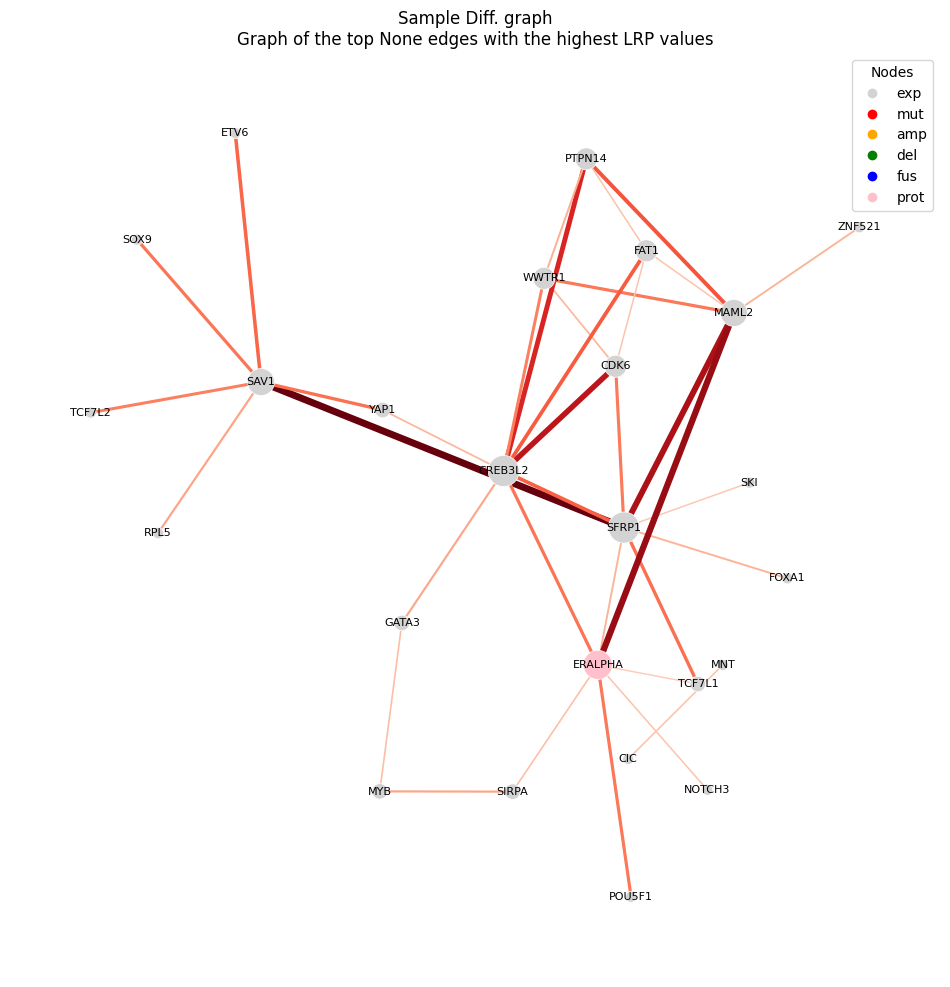

In [68]:
fg.plot_graph(diff_graph.diff_graph, node_color_mapper)

In [69]:
diff_graph.diff_graph.G.edges

EdgeView([('SAV1_exp', 'SFRP1_exp'), ('SAV1_exp', 'ETV6_exp'), ('SAV1_exp', 'YAP1_exp'), ('SAV1_exp', 'SOX9_exp'), ('SAV1_exp', 'TCF7L2_exp'), ('SAV1_exp', 'RPL5_exp'), ('SFRP1_exp', 'MAML2_exp'), ('SFRP1_exp', 'CREB3L2_exp'), ('SFRP1_exp', 'TCF7L1_exp'), ('SFRP1_exp', 'CDK6_exp'), ('SFRP1_exp', 'FOXA1_exp'), ('SFRP1_exp', 'ERALPHA_prot'), ('SFRP1_exp', 'SKI_exp'), ('ERALPHA_prot', 'MAML2_exp'), ('ERALPHA_prot', 'CREB3L2_exp'), ('ERALPHA_prot', 'POU5F1_exp'), ('ERALPHA_prot', 'SIRPA_exp'), ('ERALPHA_prot', 'NOTCH3_exp'), ('ERALPHA_prot', 'TCF7L1_exp'), ('MAML2_exp', 'PTPN14_exp'), ('MAML2_exp', 'WWTR1_exp'), ('MAML2_exp', 'ZNF521_exp'), ('MAML2_exp', 'FAT1_exp'), ('CDK6_exp', 'CREB3L2_exp'), ('CDK6_exp', 'WWTR1_exp'), ('CDK6_exp', 'FAT1_exp'), ('CREB3L2_exp', 'PTPN14_exp'), ('CREB3L2_exp', 'FAT1_exp'), ('CREB3L2_exp', 'WWTR1_exp'), ('CREB3L2_exp', 'GATA3_exp'), ('CREB3L2_exp', 'YAP1_exp'), ('PTPN14_exp', 'WWTR1_exp'), ('PTPN14_exp', 'FAT1_exp'), ('MYB_exp', 'SIRPA_exp'), ('MYB_exp', 'G

In [70]:
diff_graph.diff_graph.node_names_no_type

['CDK6',
 'CIC',
 'CREB3L2',
 'ERALPHA',
 'ETV6',
 'FAT1',
 'FOXA1',
 'GATA3',
 'MAML2',
 'MNT',
 'MYB',
 'NOTCH3',
 'POU5F1',
 'PTPN14',
 'RPL5',
 'SAV1',
 'SFRP1',
 'SIRPA',
 'SKI',
 'SOX9',
 'TCF7L1',
 'TCF7L2',
 'WWTR1',
 'YAP1',
 'ZNF521']

### gene enrichment using gProfiler

In [168]:
import gprofiler_code as ge
importlib.reload(ge)

<module 'gprofiler_code' from 'C:\\Users\\owysocky\\Documents\\GitHub\\CCE_scGeneRAI\\source\\investigate_and_compare\\gprofiler_code.py'>

In [ ]:
gene_list = diff_graph.diff_graph.node_names_no_type

ge_analyser = ge.GE_Analyser(gene_list)

In [170]:
ge_results = ge_analyser.run_GE_on_nodes(user_threshold=0.002)
ge_results

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:BP,GO:0060487,lung epithelial cell differentiation,0.000049,True,"""The process in which a relatively unspecializ...",29,24,4,21017,0.166667,0.137931,query_1,"[GO:0030855, GO:0060428, GO:0060479]"
1,GO:BP,GO:0060479,lung cell differentiation,0.000049,True,"""The process in which relatively unspecialized...",29,24,4,21017,0.166667,0.137931,query_1,"[GO:0030154, GO:0030324]"
2,GO:BP,GO:0060428,lung epithelium development,0.000305,True,"""The biological process whose specific outcome...",45,24,4,21017,0.166667,0.088889,query_1,"[GO:0030324, GO:0060429]"
3,GO:BP,GO:0072182,regulation of nephron tubule epithelial cell d...,0.000599,True,"""Any process that modulates the frequency, rat...",13,24,3,21017,0.125000,0.230769,query_1,"[GO:0072160, GO:2000696]"
4,GO:BP,GO:0072160,nephron tubule epithelial cell differentiation,0.000952,True,"""The process in which relatively unspecialized...",15,24,3,21017,0.125000,0.200000,query_1,"[GO:0035850, GO:0072080]"
5,GO:BP,GO:2000696,regulation of epithelial cell differentiation ...,0.001420,True,"""Any process that modulates the frequency, rat...",17,24,3,21017,0.125000,0.176471,query_1,"[GO:0030856, GO:0035850]"
6,REAC,REAC:R-HSA-2028269,Signaling by Hippo,0.001845,True,Signaling by Hippo,19,21,3,10916,0.142857,0.157895,query_1,[REAC:R-HSA-162582]
7,CORUM,CORUM:6651,WWTR1-YAP1 complex,0.000765,True,WWTR1-YAP1 complex,2,8,2,3383,0.250000,1.000000,query_1,[CORUM:0000000]


In [171]:
ge_verbalised = ge_analyser.verbalize_enrichment_results()
print(ge_verbalised)


Based on Gene Enrichment analysis, the entities:
['CDK6', 'CIC', 'CREB3L2', 'ERALPHA', 'ETV6', 'FAT1', 'FOXA1', 'GATA3', 'MAML2', 'MNT', 'MYB', 'NOTCH3', 'POU5F1', 'PTPN14', 'RPL5', 'SAV1', 'SFRP1', 'SIRPA', 'SKI', 'SOX9', 'TCF7L1', 'TCF7L2', 'WWTR1', 'YAP1', 'ZNF521']
the following processes or pathways were found to be enriched:

-- lung epithelial cell differentiation; described as "The process in which a relatively unspecialized cell acquires specialized features of an epithelial cell that contributes to the epithelium of the lung." [GOC:dph]
-- lung cell differentiation; described as "The process in which relatively unspecialized cells, e.g. embryonic or regenerative cells, acquire specialized structural and/or functional features of a mature cell found in the lung. Differentiation includes the processes involved in commitment of a cell to a specific fate." [GOC:dph, GOC:mtg_lung]
-- lung epithelium development; described as "The biological process whose specific outcome is the pr

## Get gene info from CIVIC db

In [158]:
import civic_evidence_code
importlib.reload(civic_evidence_code)
path = r'C:\Users\owysocky\Documents\GitHub\CCE_scGeneRAI\resources\civicdb'

gene_list = diff_graph.diff_graph.node_names_no_type

analyzer = civic_evidence_code.CivicEvidenceAnalyzer(path, gene_list)
analyzer.create_feature_details_dict()

analyzer.matching_features


,feature_id,feature_name,aliases,description
138,1769,ETV6,"['ETV6', 'TEL', 'TEL/ABL', 'THC5']",NaN
143,1827,FAT1,"['CDHF7', 'CDHR8', 'FAT', 'FAT1', 'ME5', 'hFat1']",NaN
163,2189,GATA3,"['GATA3', 'HDR', 'HDRS']",NaN
256,3730,MYB,"['Cmyb', 'MYB', 'c-myb', 'c-myb_CDS', 'efg']",NaN
276,3936,NOTCH3,"['CADASIL', 'CADASIL1', 'CASIL', 'IMF2', 'LMNS...",NaN
304,4419,POU5F1,"['OCT3', 'OCT4', 'OTF-3', 'OTF3', 'OTF4', 'Oct...",NaN
474,8292,YAP1,"['COB1', 'YAP', 'YAP-1', 'YAP1', 'YAP2', 'YAP6...",NaN
504,9326,CIC,"['CIC', 'MRD45']",NaN


In [159]:
details_dict = analyzer.add_evidence_to_dict()
details_dict

{'ETV6': {'Description': nan,
  'Summary': 'This gene encodes an ETS family transcription factor. The product of this gene contains two functional domains: a N-terminal pointed (PNT) domain that is involved in protein-protein interactions with itself and other proteins, and a C-terminal DNA-binding domain. Gene knockout studies in mice suggest that it is required for hematopoiesis and maintenance of the developing vascular network. This gene is known to be involved in a large number of chromosomal rearrangements associated with leukemia and congenital fibrosarcoma. [provided by RefSeq, Sep 2008].',
  'Molecular_profiles': [],
  'Evidence': ['In a study of 439 patients with myelodysplastic syndrome, patients with ETV6 mutations (N=12) has worse overall survival than wildtype patients (N=427) (P=0.05 univariate). This difference was also observed after adjusting for IPSS risk (P=0.04) and multivariate analysis including IPSS and age (HR=2.04, 95% CI 1.08-3.86, P=0.03).',
   '13 members o

In [160]:
civicdb_knowledge = analyzer.verbalize_civicdb_knowledge()
print(civicdb_knowledge )

Feature: ETV6
Description: nan
Summary: This gene encodes an ETS family transcription factor. The product of this gene contains two functional domains: a N-terminal pointed (PNT) domain that is involved in protein-protein interactions with itself and other proteins, and a C-terminal DNA-binding domain. Gene knockout studies in mice suggest that it is required for hematopoiesis and maintenance of the developing vascular network. This gene is known to be involved in a large number of chromosomal rearrangements associated with leukemia and congenital fibrosarcoma. [provided by RefSeq, Sep 2008].
Molecular Profiles:
Evidence:
	- In a study of 439 patients with myelodysplastic syndrome, patients with ETV6 mutations (N=12) has worse overall survival than wildtype patients (N=427) (P=0.05 univariate). This difference was also observed after adjusting for IPSS risk (P=0.04) and multivariate analysis including IPSS and age (HR=2.04, 95% CI 1.08-3.86, P=0.03).
	- 13 members of a larger pedigree 

### PharmaKB

In [179]:
import pharmabk_code as pbk
importlib.reload(pbk)

<module 'pharmabk_code' from 'C:\\Users\\owysocky\\Documents\\GitHub\\CCE_scGeneRAI\\source\\investigate_and_compare\\pharmabk_code.py'>

In [ ]:
gene_list = diff_graph.diff_graph.node_names_aliases
pharmakb_analyzer = pbk.Pharmakb_Analyzer(gene_list)

pharmakb_analyzer.get_pharmakb_knowledge(files_path = 'C:\\Users\\owysocky\\Documents\\GitHub\\CCE_scGeneRAI\\resources\\pharmgkb')


In [184]:
pharmakb_analyzer.pharmakb_var_pheno_ann_filtered.head()

,Gene,Drug(s),Sentence,Notes,PMID
0,TCF7L2,"sulfonamides, urea derivatives",Genotype CC is associated with increased respo...,NaN,21114608
1,GATA3,"asparaginase, cyclophosphamide, cytarabine, da...",Allele A is associated with increased minimal ...,The A allele was associated with higher MRD le...,24141364
2,TCF7L2,"glimepiride, glipizide, glyburide",Allele T is not associated with risk of Hypogl...,The paper does not specify which alleles were ...,32504053
3,GATA3,"asparaginase, cyclophosphamide, cytarabine, da...",Allele A is associated with increased likeliho...,The A allele of this SNP was also associated w...,24141364
4,TCF7L2,tacrolimus,Genotype CG is not associated with risk of Dia...,No significant association was seen when consi...,23041303


In [185]:
pharmakb_analyzer.pharmakb_var_fa_ann_filtered.head()

,Gene,Drug(s),Sentence,Notes,PMID
0,YAP1,NaN,Allele C is associated with decreased transcri...,rs1820453 was in complete linkage with rs10895...,21118971


In [186]:
pharmakb_analyzer.pharmakb_var_drug_ann_filtered.head()

,Gene,Drug(s),Sentence,Notes,PMID
0,FAT1,aripiprazole,Allele C is not associated with response to ar...,corrected p > 0.05. Benzodiazepines and antip...,19893579
1,FAT1,aripiprazole,Allele A is not associated with response to ar...,corrected p > 0.05. Benzodiazepines and antip...,19893579
2,FAT1,aripiprazole,Allele A is not associated with response to ar...,corrected p > 0.05. Benzodiazepines and antip...,19893579
3,GATA3,prednisolone,Genotype AA is associated with decreased clini...,NaN,36714653
4,FAT1,aripiprazole,Allele C is not associated with response to ar...,corrected p > 0.05. Benzodiazepines and antip...,19893579


In [187]:
pharmakb_knowledge = pharmakb_analyzer.verbalise_pharmakb_knowledge()
print(pharmakb_knowledge)

Based on PharmGKB knowledge, the following information was found for the genes in the differential graph:

Gene: TCF7L2; Drug(s): sulfonamides, urea derivatives; Statement: Genotype CC is associated with increased response (reductions in haemoglobin A1c (HbA1c) and fasting plasma glucose (FPG) levels) when treated with sulfonamides, urea derivatives in people with Diabetes Mellitus, Type 2 as compared to genotypes CT + TT.; Notes: nan; (PMID: 21114608).Notes: nan; (PMID: 21114608).
Gene: GATA3; Drug(s): asparaginase, cyclophosphamide, cytarabine, daunorubicin, dexamethasone, doxorubicin, leucovorin, mercaptopurine, methotrexate, pegaspargase, prednisone, thioguanine, vincristine; Statement: Allele A is associated with increased minimal residual disease when treated with asparaginase, cyclophosphamide, cytarabine, daunorubicin, dexamethasone, doxorubicin, leucovorin, mercaptopurine, methotrexate, pegaspargase, prednisone, thioguanine and vincristine in children with Precursor Cell Lymph